Q1. Describe the decision tree classifier algorithm and how it works to make predictions.

Certainly! Decision trees are a type of machine-learning algorithm used for both classification and regression tasks. Let's dive into the details:

1. **Components of a Decision Tree**:
   - **Root Node**: The topmost node represents the complete dataset and serves as the starting point for decision-making.
   - **Internal Node**: These nodes symbolize choices based on input features. They connect to leaf nodes or other internal nodes.
   - **Leaf/Terminal Node**: These nodes have no child nodes and indicate a class label (for classification) or a numerical value (for regression)¹.

2. **Working of Decision Trees**:
   - Decision trees recursively partition the data into smaller subsets based on feature values.
   - At each internal node, the algorithm selects the most informative feature to split the data.
   - The process continues until a stopping condition is met (e.g., specific depth or minimum data points in a node).
   - Each leaf node provides a prediction for the target variable².

3. **Mathematical Concepts Behind Decision Trees**:
   - Decision trees use impurity measures (e.g., Gini impurity, entropy) to evaluate splits.
   - The goal is to create a model that predicts the target variable by learning simple decision rules from data features.
   - Pruning methods help prevent overfitting, resulting in more interpretable trees³.

4. **Types of Decision Tree Algorithms**:
   - **ID3 (Iterative Dichotomiser 3)**: Constructs trees using information gain.
   - **C4.5**: An extension of ID3 that handles continuous features.
   - **CART (Classification and Regression Trees)**: Builds binary trees and supports both classification and regression.
   - **CHAID (Chi-Square Automatic Interaction Detection)**: Used for categorical data.
   - **MARS (Multivariate Adaptive Regression Splines)**: Combines linear segments to form a piecewise approximation¹.

Decision trees are versatile, interpretable, and foundational for ensemble techniques like Random Forests and Gradient Boosting. They help us understand the logic behind predictions while being mindful of overfitting¹.

 Below is an example program in Python that demonstrates how a Decision Tree Classifier works. This example uses the scikit-learn library, which is a popular machine learning library in Python. The program trains a Decision Tree Classifier on a sample dataset, makes predictions, and evaluates its performance.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree


In [2]:
# Load a sample dataset (Iris dataset)
data = load_iris()
X = data.data  # Features
y = data.target  # Target labels


In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier()


In [5]:
clf

DecisionTreeClassifier()

In [6]:
# Train the model
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [7]:
# Make predictions
y_pred = clf.predict(X_test)


In [8]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


In [9]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [10]:
# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


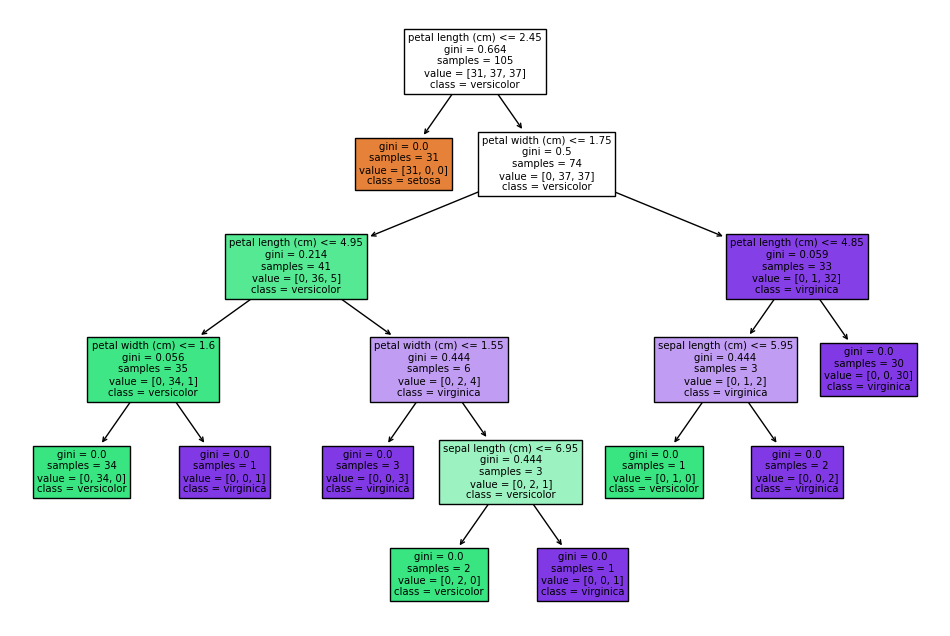

In [11]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()


Q2. Provide a step-by-step explanation of the mathematical intuition behind decision tree classification.

Decision tree classification is a popular method for both classification and regression tasks in machine learning. Here’s a step-by-step explanation of the mathematical intuition behind decision tree classification:

### 1. **Tree Structure**

A decision tree is a flowchart-like structure where:
- **Nodes** represent features or attributes.
- **Edges** represent decision rules or splits based on those features.
- **Leaves** represent the outcome or classification result.

### 2. **Starting Point: Root Node**

- **Root Node**: This is the starting point of the tree where the first decision is made. It’s based on the feature that best splits the data into classes.

### 3. **Choosing the Best Split**

To decide how to split the data at each node, we use metrics to evaluate the "quality" of a split. Common metrics include:

#### a. **Gini Impurity**

- **Formula**:
  \[
  \text{Gini}(t) = 1 - \sum_{i=1}^{k} p_i^2
  \]
  where \( p_i \) is the probability of an item being classified into class \( i \).

- **Intuition**: It measures the impurity of a node. A node with a Gini impurity of 0 means all the samples in that node belong to a single class.

#### b. **Entropy and Information Gain**

- **Entropy**:
  \[
  \text{Entropy}(t) = - \sum_{i=1}^{k} p_i \log_2(p_i)
  \]
  where \( p_i \) is the probability of an item being in class \( i \).

- **Information Gain**:
  \[
  \text{IG}(t, f) = \text{Entropy}(t) - \sum_{j=1}^{m} \frac{|t_j|}{|t|} \text{Entropy}(t_j)
  \]
  where \( t \) is the set of instances at the node, \( f \) is the feature used for splitting, \( t_j \) is the subset of instances in the \( j \)-th branch, and \( |t| \) represents the number of instances.

- **Intuition**: Entropy measures the disorder or impurity. Information Gain measures how much uncertainty is reduced by knowing the value of a feature. A split with higher Information Gain is preferred.

### 4. **Recursive Partitioning**

- The process of splitting nodes is recursive. For each node, the feature that maximizes the chosen metric (Gini, Entropy) is selected to split the node. This process is applied to each resulting node, creating branches and sub-branches.

### 5. **Stopping Criteria**

- The recursive splitting continues until one or more stopping criteria are met:
  - **Maximum Depth**: The tree has reached a predefined depth.
  - **Minimum Samples per Leaf**: The node has fewer than a specified number of samples.
  - **Minimum Impurity Decrease**: The reduction in impurity is below a threshold.

### 6. **Classification**

- Once the tree is built, classification of new instances involves traversing the tree from the root to a leaf node by following the decision rules. The class label of the leaf node is the predicted class.

### Example Walkthrough

1. **Starting at the Root**: Suppose the root node is split based on whether a feature \( X_1 \) is greater than a threshold \( \theta \). The decision to split on \( X_1 \) is made if this split maximizes the chosen metric.

2. **Branching**: For each branch resulting from the split, the process is repeated, evaluating different features and thresholds to further split the branches until stopping criteria are met.

3. **Classification**: For a new data point, you traverse the tree according to the feature values until reaching a leaf node, which provides the class label.

Decision trees are powerful due to their interpretability and ability to handle both numerical and categorical data, but they can be prone to overfitting, which can be mitigated by techniques such as pruning or setting limits on tree depth.

Q3. Explain how a decision tree classifier can be used to solve a binary classification problem.

 Let's explore how a **decision tree classifier** can be used for binary classification:

1. **Building the Tree**:
   - A decision tree is a flowchart-like structure where each internal node represents a feature, each branch represents a decision rule, and each leaf node represents a class label.
   - To build the tree:
     - Start with the entire dataset at the root node.
     - Choose the best feature to split the data (e.g., using information gain or Gini impurity).
     - Recursively split the data into subsets based on the chosen feature.
     - Repeat until a stopping criterion is met (e.g., maximum depth or minimum samples per leaf).

2. **Making Predictions**:
   - Once the tree is built:
     - For a new data point, traverse the tree from the root to a leaf node.
     - At each internal node, follow the decision rule based on the feature value.
     - The leaf node reached determines the predicted class label.

3. **Example**:
   - Suppose we have a dataset of emails labeled as "spam" or "not spam."
   - Features could include word frequency, sender, etc.
   - The decision tree might split based on the presence of specific words or sender domains.
   - A leaf node might predict "spam" if certain conditions are met.

4. **Advantages**:
   - Interpretable: Easy to understand and visualize.
   - Handles both categorical and numerical features.
   - Captures non-linear relationships.

5. **Challenges**:
   - Prone to overfitting (use regularization or ensemble methods).
   - Sensitive to small variations in data.

Remember, decision trees are powerful tools, but proper tuning and validation are essential for optimal performance.

Let’s create a Python program to solve a binary classification problem using a decision tree classifier.
 We'll use the popular scikit-learn library for this purpose. In this example, we will use a synthetic dataset for simplicity. If you have your own dataset, you can replace it accordingly.

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt


In [13]:
# Create a synthetic dataset
data = {
    'Age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'Income': [20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000],
    'Education Level': [1, 2, 2, 3, 3, 4, 4, 5, 5, 6],  # 1: High School, 2: Associate, 3: Bachelor's, 4: Master's, 5: PhD
    'Will Buy': [0, 0, 0, 1, 1, 1, 1, 0, 0, 0]  # 0: No, 1: Yes
}

df = pd.DataFrame(data)

# Features and target variable
X = df[['Age', 'Income', 'Education Level']]
y = df['Will Buy']


In [14]:
df

,Age,Income,Education Level,Will Buy
0,25,20000,1,0
1,30,25000,2,0
2,35,30000,2,0
3,40,35000,3,1
4,45,40000,3,1
5,50,45000,4,1
6,55,50000,4,1
7,60,55000,5,0
8,65,60000,5,0
9,70,65000,6,0


In [15]:
X

,Age,Income,Education Level
0,25,20000,1
1,30,25000,2
2,35,30000,2
3,40,35000,3
4,45,40000,3
5,50,45000,4
6,55,50000,4
7,60,55000,5
8,65,60000,5
9,70,65000,6


In [16]:
y

,Will Buy
0,0
1,0
2,0
3,1
4,1
5,1
6,1
7,0
8,0
9,0


In [17]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [19]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



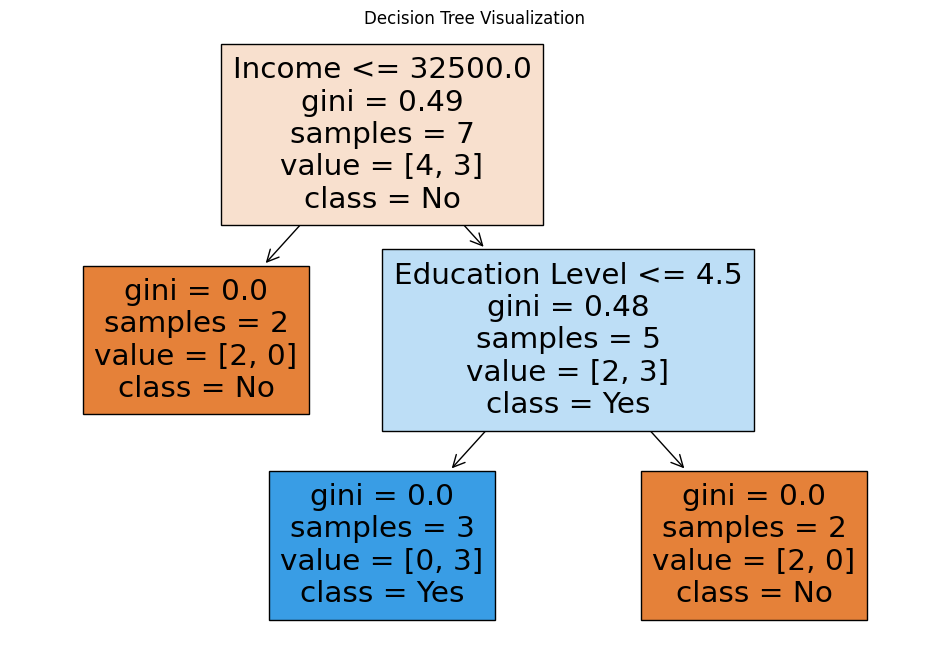

In [20]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=['Age', 'Income', 'Education Level'], class_names=['No', 'Yes'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()


Q4. Discuss the geometric intuition behind decision tree classification and how it can be used to make
predictions.

Decision trees are a popular classification method in machine learning that provide an intuitive way to make predictions. Here's a breakdown of the geometric intuition behind decision tree classification:

### Geometric Intuition

1. **Tree Structure**:
   - A decision tree can be visualized as a tree-like structure with nodes and branches. Each internal node represents a decision or a test on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label or a probability distribution over classes.

2. **Splitting Data**:
   - The fundamental idea behind a decision tree is to split the data into subsets based on the values of the input features. Each split is designed to maximize the separation of classes. Geometrically, this means that the feature space is divided into regions, with each region corresponding to a class label.

3. **Decision Boundaries**:
   - Each split in the decision tree corresponds to a hyperplane (in 2D, this is just a line) that partitions the feature space. As you move deeper into the tree, more splits occur, and the feature space becomes increasingly fragmented. The result is a piecewise constant function where the decision boundaries are parallel to the feature axes.

4. **Piecewise Constant Function**:
   - The decision tree essentially creates a series of axis-aligned rectangles (or hyperrectangles in higher dimensions) in the feature space. Each rectangle corresponds to a particular class label. When making predictions, the tree assigns a label to a data point based on which rectangle (or leaf) the point falls into.

### Making Predictions

1. **Traversing the Tree**:
   - To make a prediction for a new instance, start at the root node of the tree and follow the branches based on the feature values of the instance. Each branch decision is based on the outcome of the test at the current node (e.g., "Is feature X ≤ value?"). Continue traversing down the tree until a leaf node is reached.

2. **Class Label Assignment**:
   - The class label associated with the leaf node where the instance ends up is the predicted class for that instance. If the leaf nodes contain probabilities (e.g., in the case of probabilistic decision trees), the prediction might be the class with the highest probability.

3. **Handling Multiple Classes**:
   - For multi-class classification, each leaf node contains information about the frequency distribution of classes among the training instances that reach that node. The prediction is usually the class with the highest frequency.

### Example

Imagine you have a decision tree for classifying fruits based on features like weight and color:

- The first split might be based on weight: "Is weight > 150 grams?"
  - If yes, follow the branch to the right.
  - If no, follow the branch to the left.

- The next split on the right branch might be based on color: "Is color red?"
  - If yes, the fruit is classified as "Apple."
  - If no, it could be classified as "Orange."

In summary, decision trees work by partitioning the feature space into regions with different class labels, making them easy to understand and interpret. The decision boundaries are aligned with the feature axes, creating a piecewise constant decision function.

Q5. Define the confusion matrix and describe how it can be used to evaluate the performance of a
classification model.

Certainly! Let's dive into the concept of the **confusion matrix** and its role in evaluating classification model performance.

1. **What is a Confusion Matrix?**
   - A confusion matrix is a **square matrix** that summarizes the performance of a machine learning model on a set of test data.
   - It compares the **actual target values** (ground truth) with the **predicted values** produced by the model.
   - The matrix provides insights into the following four key metrics:
     - **True Positives (TP)**: Correctly predicted positive instances (actual outcome was positive).
     - **True Negatives (TN)**: Correctly predicted negative instances (actual outcome was negative).
     - **False Positives (FP)**: Incorrectly predicted positive instances (actual outcome was negative). Also known as a Type I error.
     - **False Negatives (FN)**: Incorrectly predicted negative instances (actual outcome was positive). Also known as a Type II error.

2. **Why Do We Need a Confusion Matrix?**
   - When assessing a classification model's performance, a confusion matrix is essential.
   - It goes beyond basic accuracy metrics and provides a deeper understanding of:
     - **Recall**: The ability to correctly identify positive instances.
     - **Precision**: How accurate the model's positive predictions are.
     - **Accuracy**: The overall correctness of predictions.
   - Especially useful when dealing with uneven class distributions in a dataset.

3. **Metrics Based on Confusion Matrix Data**:
   - **Accuracy**: Ratio of total correct instances to the total instances.
     - $$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$
   - **Precision**: Ratio of true positive predictions to the total positive predictions made by the model.

Remember, the confusion matrix helps us analyze model performance, identify misclassifications, and improve predictive accuracy.

Q6. Provide an example of a confusion matrix and explain how precision, recall, and F1 score can be
calculated from it.

Certainly! Let's dive into the world of confusion matrices and performance metrics for machine learning models.

### Confusion Matrix
A **confusion matrix** is a powerful tool for evaluating the performance of a classification model. It provides a detailed breakdown of how well the model's predictions align with the actual class labels. Let's start with a binary classification example, and then we'll extend it to multi-class scenarios.

#### Binary Classification Example
Suppose we have a model that predicts whether an image contains a cat or a dog. Here's a hypothetical confusion matrix for this scenario:

|                | Predicted Cat | Predicted Dog |
|----------------|---------------|---------------|
| Actual Cat     | 90 (True Positive) | 10 (False Negative) |
| Actual Dog     | 5 (False Positive) | 895 (True Negative) |

In this matrix:
- **True Positive (TP)**: The model correctly predicted a cat (actual cat, predicted cat).
- **False Positive (FP)**: The model incorrectly predicted a cat when it was actually a dog (actual dog, predicted cat).
- **True Negative (TN)**: The model correctly predicted a dog (actual dog, predicted dog).
- **False Negative (FN)**: The model incorrectly predicted a dog when it was actually a cat (actual cat, predicted dog).

### Precision, Recall, and F1 Score
Now, let's break down some essential metrics derived from the confusion matrix:

1. **Precision**:
   - Precision measures how many of the positive predictions made by the model are actually correct.
   - It is calculated as: $$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$$
   - In our example: $$\text{Precision} = \frac{90}{90 + 5} = 0.947$$

2. **Recall (Sensitivity)**:
   - Recall quantifies how well the model identifies all positive instances in the dataset.
   - It is calculated as: $$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$$
   - In our example: $$\text{Recall} = \frac{90}{90 + 10} = 0.9$$

3. **F1 Score**:
   - The F1 score balances precision and recall, providing a single metric that considers both.
   - It is the harmonic mean of precision and recall:
     $$\text{F1-Score} = \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$
   - In our example: $$\text{F1-Score} = \frac{2 \cdot 0.947 \cdot 0.9}{0.947 + 0.9} = 0.923$$

Remember that these metrics help us understand different aspects of model performance, especially when dealing with imbalanced datasets or critical applications. Feel free to explore more complex scenarios with multi-class confusion matrices.

Q7. Discuss the importance of choosing an appropriate evaluation metric for a classification problem and
explain how this can be done.

Certainly! Choosing the right evaluation metric for a classification problem is crucial for assessing model performance effectively. Let's delve into why it matters and how to go about it:

1. **Why Choose the Right Metric?**
   - **Optimizing During Training**: Selecting an appropriate metric guides the model during training. It ensures that the model optimizes toward the desired outcome, aligning with business goals.
   - **Real-World Evaluation**: The chosen metric reflects how well the model might perform in real-world scenarios. It helps us understand whether the expected performance meets our objectives².

2. **Common Classification Metrics**:
   - **Accuracy**: The proportion of correctly predicted instances (both true positives and true negatives). However, it can be misleading when class distribution is imbalanced.
   - **Precision**: The ratio of true positives to the total predicted positives. Useful when minimizing false positives is critical (e.g., spam detection).
   - **Recall (Sensitivity)**: The ratio of true positives to the total actual positives. Important when minimizing false negatives (e.g., medical diagnoses).
   - **F1 Score**: The harmonic mean of precision and recall. Balances both metrics.
   - **Specificity**: The ratio of true negatives to the total actual negatives.
   - **Area Under the Receiver Operating Characteristic Curve (AUC-ROC)**: Measures the model's ability to distinguish between classes.
   - **Cohen's Kappa**: Accounts for chance agreement beyond accuracy.
   - **Gini Coefficient**: Similar to AUC-ROC, but scaled differently.
   - **Somers' D Statistic**: Evaluates predictive power.
   - **KS Statistic**: Measures the maximum difference between cumulative distributions.
   - **Concordance and Discordance**: Used in survival analysis.
   
3. **Interpreting the Confusion Matrix**:
   - The confusion matrix provides detailed insights into model performance.
   - It includes metrics like accuracy, sensitivity, specificity, precision, recall, F1 score, and more.
   - Always specify the positive class to avoid confusion¹.

Remember that the choice of metric depends on the problem context, business goals, and class distribution.

Q8. Provide an example of a classification problem where precision is the most important metric, and
explain why.

Precision is crucial in scenarios where the cost of false positives is high. One classic example is in medical diagnostics, specifically in screening for a rare but serious disease, such as cancer.

### Example: Cancer Screening

**Problem:** Suppose we have a diagnostic test for a rare type of cancer. In this scenario, the test may return positive results for individuals who do not have cancer (false positives).

**Why Precision Matters:**

1. **Minimizing False Positives:** Precision focuses on the proportion of positive test results that are true positives. In cancer screening, a high precision means that when the test indicates cancer, it's more likely to be correct. This reduces the number of healthy individuals incorrectly diagnosed with cancer.

2. **Reducing Psychological and Financial Impact:** False positives can cause unnecessary stress, anxiety, and potentially lead to unnecessary follow-up tests and treatments, which can be costly and invasive. Ensuring high precision helps minimize these negative outcomes.

3. **Resource Allocation:** In cases where the disease is rare, a high precision helps ensure that the limited resources for diagnosis and treatment are used more effectively. It prevents overwhelming the healthcare system with false alarms.

In summary, when precision is prioritized in cancer screening, it helps avoid the unnecessary distress and financial burden associated with false positive results, which is crucial given the high stakes involved in correctly diagnosing such a serious condition.


To illustrate how precision can be calculated and evaluated, we'll create a simple Python program using scikit-learn. This example will use a synthetic dataset to simulate a classification problem where precision is the key metric. We'll use logistic regression as the classifie

In [21]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, classification_report


In [22]:
# Step 1: Generate a synthetic dataset
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=10,
    n_redundant=10,
    n_clusters_per_class=1,
    weights=[0.95, 0.05],  # Imbalanced dataset (95% negative, 5% positive)
    flip_y=0,
    random_state=42
)

In [23]:
# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [24]:
# Step 3: Train a logistic regression classifier
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [25]:
# Step 4: Predict on the test set
y_pred = model.predict(X_test)


In [26]:
# Step 5: Calculate precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')


Precision: 1.00


In [27]:
# Display a detailed classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       282
           1       1.00      0.78      0.88        18

    accuracy                           0.99       300
   macro avg       0.99      0.89      0.93       300
weighted avg       0.99      0.99      0.99       300



Let's use a real dataset for a classification problem where precision is crucial.
A good example is the Breast Cancer Wisconsin (Diagnostic) dataset from scikit-learn. This dataset contains features for breast cancer samples, and the goal is to classify them as malignant (positive class) or benign (negative class)

In [28]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, classification_report


In [29]:
# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target


In [30]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [31]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [32]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [33]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [34]:
# Train a logistic regression classifier
model = LogisticRegression(max_iter=10000)  # Increasing max_iter to ensure convergence
model.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [35]:
# Predict on the test set
y_pred = model.predict(X_test)


In [36]:
# Calculate precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')


Precision: 0.98


In [37]:
# Display a detailed classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



An example of a classification problem where recall is the most important metric is **medical diagnosis for a rare but serious disease**.

### Scenario
Imagine a medical test designed to detect a rare disease that, if left untreated, could have severe consequences for the patient. The disease might be rare, so the prevalence in the general population is low. However, when it does occur, early detection is crucial for effective treatment and positive outcomes.

### Why Recall is Important
In this case, **recall** (also known as the True Positive Rate) is crucial because it measures the proportion of actual positive cases (patients who truly have the disease) that the test successfully identifies. High recall ensures that most patients who actually have the disease are detected by the test, minimizing the number of false negatives (cases where the disease is present but not detected).

#### Key Points:
- **Avoiding False Negatives**: A high recall means fewer patients with the disease are missed. Missing a diagnosis could lead to a lack of treatment, worsening the patient's condition, or even leading to a fatal outcome.
- **Early Intervention**: For serious diseases, early detection and treatment are often critical. High recall increases the likelihood that those needing intervention are identified and treated promptly.
- **Cost of Missed Cases**: The cost of missing a diagnosis (false negatives) can be severe, including the risk to the patient's health, additional costs for more advanced treatments later, and potential legal implications.

While **precision** (the proportion of true positives among all positive predictions) is also important, in this scenario, the cost of missing a case (false negative) outweighs the cost of false positives (incorrectly diagnosing someone who doesn’t have the disease). Therefore, recall takes precedence as the key performance metric.

 Let's create a Python program to demonstrate a classification problem using a real dataset. We'll use the Breast Cancer Wisconsin (Diagnostic) dataset from the sklearn.datasets module, which is a common dataset for binary classification problems. The goal will be to build a classifier to detect whether a tumor is malignant or benign.

## 1. Import Libraries


In [38]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, recall_score, confusion_matrix


## 2. Load and Prepare the Dataset


In [39]:
# Load the Breast Cancer dataset
# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target


In [40]:
# Convert to a DataFrame for easier inspection
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


In [41]:
# Print the first few rows of the dataframe
print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

## 3. Split the Data


In [42]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## 4. Train a Model


In [43]:
# Initialize and train the RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## 5. Make Predictions


In [44]:
# Make predictions
y_pred = clf.predict(X_test)
# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Recall Score: {:.2f}".format(recall_score(y_test, y_pred)))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Recall Score: 0.99
Confusion Matrix:
 [[ 59   4]
 [  1 107]]
